# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir(os.path.dirname(os.path.abspath("/content/drive/My Drive/ColabNotebooks/images.npy")))#### Add your code here ####

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [7]:
os.getcwd()

'/content/drive/My Drive/ColabNotebooks'

In [0]:
import numpy as np
data = np.load("images.npy",allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [9]:
print(data.shape)
print(data[0].shape)
print(data[0][0])

(409, 2)
(2,)
[[[42 37 34]
  [56 51 48]
  [71 66 63]
  ...
  [23 33 34]
  [26 36 37]
  [28 38 39]]

 [[40 35 32]
  [51 46 43]
  [64 59 56]
  ...
  [27 36 35]
  [24 33 32]
  [26 35 34]]

 [[43 38 35]
  [51 46 43]
  [61 56 53]
  ...
  [28 30 27]
  [33 35 32]
  [35 37 34]]

 ...

 [[56 47 40]
  [57 48 41]
  [61 52 45]
  ...
  [67 48 42]
  [55 35 28]
  [60 40 33]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [60 40 33]
  [54 34 27]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [70 50 43]
  [64 44 37]]]


In [0]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [13]:
masks[0].shape

(224, 224)

In [14]:
X_train.shape

(409, 224, 224, 3)

### Print the shape of X_train and mask array  (1 mark)

In [15]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [16]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.22352946 -0.20784312 -0.51372552]
  [ 0.28627455 -0.21568626 -0.51372552]
  [ 0.30980396 -0.23921567 -0.49803919]
  ...
  [ 0.94509804  0.7647059   0.25490201]
  [ 0.57647061  0.25490201 -0.15294117]
  [ 0.45882356  0.15294123 -0.15294117]]

 [[ 0.4039216  -0.09803921 -0.46666664]
  [ 0.27058828 -0.26274508 -0.53725493]
  [ 0.34117651 -0.1607843  -0.52156866]
  ...
  [ 0.74117649  0.4666667   0.15294123]
  [ 0.52941179  0.18431377 -0.16862744]
  [ 0.6156863   0.3176471   0.01176476]]

 [[ 0.32549024 -0.14509803 -0.47450978]
  [ 0.60000002  0.05882359 -0.372549  ]
  [ 0.87450981  0.27843142 -0.26274508]
  ...
  [ 0.56078434  0.27843142 -0.06666666]
  [ 0.3176471   0.04313731 -0.27058822]
  [ 0.63921571  0.34117651  0.03529418]]

 ...

 [[-0.44313723 -0.68627453 -0.89803922]
  [-0.29411763 -0.60784316 -0.84313726]
  [-0.23137254 -0.56862748 -0.89019608]
  ...
  [-0.58431375 -0.78039217 -0.85882354]
  [-0.63137257 -0.80392158 -0.88235295]
  [-0.372549   -0.41176468 -0.43529409]]

 [

(224, 224, 3)

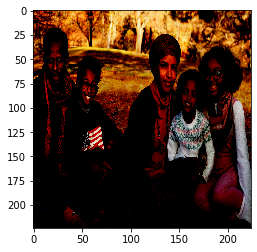

In [17]:
from matplotlib import pyplot
n = 12
print(X_train[n])
pyplot.imshow(X_train[n])
X_train[n].shape

(224, 224)


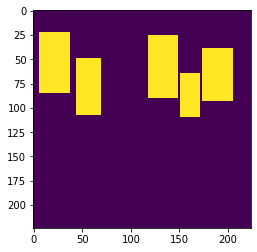

In [18]:
print(masks[n].shape)
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [19]:
model = MobileNet(weights='imagenet',include_top=False,input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3), alpha=1.0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step


In [20]:
model.summary()  #mobile net model summary 

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [21]:
model.get_layer('conv_pw_1_relu').output

<tf.Tensor 'conv_pw_1_relu/Relu6:0' shape=(?, 112, 112, 64) dtype=float32>

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, BatchNormalization, Activation, SpatialDropout2D
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K 
import tensorflow as tf


def create_model(trainable=True):
    model = MobileNet(weights='imagenet',include_top=False,input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3), alpha=1.0)#### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####
    conv1 = model.get_layer('conv_pw_1_relu').output
    conv2 = model.get_layer('conv_pw_3_relu').output
    conv3 = model.get_layer('conv_pw_5_relu').output
    conv4 = model.get_layer('conv_pw_11_relu').output
    conv5 = model.get_layer('conv_pw_13_relu').output
    up6 = Concatenate(axis=-1)([UpSampling2D()(conv5), conv4])
    conv6 = conv_block_simple(up6, 256, "conv6_1")
    conv6 = conv_block_simple(conv6, 256, "conv6_2")

    up7 = Concatenate(axis=-1)([UpSampling2D()(conv6), conv3])
    conv7 = conv_block_simple(up7, 256, "conv7_1")
    conv7 = conv_block_simple(conv7, 256, "conv7_2")

    up8 = Concatenate(axis=-1)([UpSampling2D()(conv7), conv2])
    conv8 = conv_block_simple(up8, 192, "conv8_1")
    conv8 = conv_block_simple(conv8, 128, "conv8_2")

    up9 = Concatenate(axis=-1)([UpSampling2D()(conv8), conv1])
    conv9 = conv_block_simple(up9, 96, "conv9_1")
    conv9 = conv_block_simple(conv9, 64, "conv9_2")

    up10 = Concatenate(axis=-1)([UpSampling2D()(conv9), model.input] )
    conv10 = conv_block_simple(up10, 48, "conv10_1")
    conv10 = conv_block_simple(conv10, 32, "conv10_2")
    conv10 = SpatialDropout2D(0.2)(conv10)
    
    x = Conv2D(1, (1, 1), activation="sigmoid", name="prediction")(conv10)
    mobile_unet_model = Model(model.input, x)
    return mobile_unet_model #### Add your code here ####

def conv_block_simple(prevlayer, filters, prefix, strides=(1, 1)):
    conv = Conv2D(filters, (3, 3), padding="same", kernel_initializer="he_normal", strides=strides, name=prefix + "_conv")(prevlayer)
    conv = BatchNormalization(name=prefix + "_bn")(conv)
    conv = Activation('relu', name=prefix + "_activation")(conv)
    return conv

def conv_block_simple_no_bn(prevlayer, filters, prefix, strides=(1, 1)):
    conv = Conv2D(filters, (3, 3), padding="same", kernel_initializer="he_normal", strides=strides, name=prefix + "_conv")(prevlayer)
    conv = Activation('relu', name=prefix + "_activation")(conv)
    return conv

### Call the create_model function

In [23]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [26]:
#### Add your code here ####
model.compile(loss=loss, optimizer = "Adam", metrics=[dice_coefficient])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Define checkpoint and earlystopping

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [28]:
#### Add your code here ####
model.fit(x=X_train,y=masks,batch_size=1,epochs=5, callbacks=[checkpoint,reduce_lr,stop])

Train on 409 samples
Epoch 1/5
406/409 [============================>.] - ETA: 0s - loss: 1.5211 - dice_coefficient: 0.4291
Epoch 00001: loss improved from inf to 1.51757, saving model to model-1.52.h5
Epoch 2/5
408/409 [============================>.] - ETA: 0s - loss: 1.2927 - dice_coefficient: 0.5102
Epoch 00002: loss improved from 1.51757 to 1.29236, saving model to model-1.29.h5
409/409 [==============================] - 10s 24ms/sample - loss: 1.2924 - dice_coefficient: 0.5102
Epoch 3/5
406/409 [============================>.] - ETA: 0s - loss: 1.1951 - dice_coefficient: 0.5521
Epoch 00003: loss improved from 1.29236 to 1.19452, saving model to model-1.19.h5
409/409 [==============================] - 10s 24ms/sample - loss: 1.1945 - dice_coefficient: 0.5525
Epoch 4/5
407/409 [============================>.] - ETA: 0s - loss: 1.0910 - dice_coefficient: 0.5915
Epoch 00004: loss improved from 1.19452 to 1.09038, saving model to model-1.09.h5
409/409 [==============================] 

### Get the predicted mask for a sample image   (3 marks)

(224, 224, 3)
(1, 224, 224, 1)


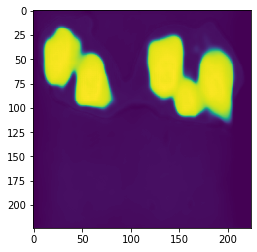

In [29]:
n = 12
sample_image = X_train[n]

#### Add your code here ####
print(sample_image.shape)
output = model.predict(sample_image.reshape((1,224,224,3)))
print(output.shape)
#pyplot.imshow(output)
predicted = output.reshape(output.shape[1],output.shape[2])
pyplot.imshow(predicted)

In [30]:
predicted.shape

(224, 224)

In [31]:
predicted

array([[5.5393875e-03, 6.5664053e-03, 7.6768994e-03, ..., 1.9398928e-03,
        2.2772551e-03, 2.9156804e-03],
       [3.4666955e-03, 4.3771565e-03, 5.4538548e-03, ..., 3.7869811e-04,
        5.2592158e-04, 9.2342496e-04],
       [2.8215647e-03, 3.3054054e-03, 4.1684806e-03, ..., 9.5099211e-05,
        1.5112758e-04, 4.1681528e-04],
       ...,
       [1.5534163e-03, 1.2179315e-03, 1.4363825e-03, ..., 8.2671642e-05,
        1.5360117e-04, 4.6005845e-04],
       [2.6012957e-03, 2.5523305e-03, 2.9470325e-03, ..., 4.4658780e-04,
        5.8573484e-04, 1.0492504e-03],
       [4.5307577e-03, 5.0098002e-03, 5.5198073e-03, ..., 2.1008849e-03,
        2.2875071e-03, 2.9540360e-03]], dtype=float32)

In [32]:
sample_image.shape

(224, 224, 3)

### Impose the mask on the image (3 marks)

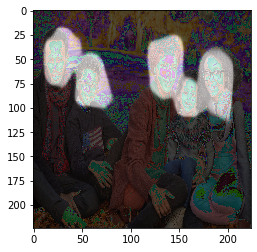

In [33]:
from PIL import Image
# Function to change the image size
def changeImageSize(maxWidth, 
                    maxHeight, 
                    image):
    
    widthRatio  = maxWidth/image.size[0]
    heightRatio = maxHeight/image.size[1]

    newWidth    = int(widthRatio*image.size[0])
    newHeight   = int(heightRatio*image.size[1])

    newImage    = image.resize((newWidth, newHeight))
    return newImage
    
# Blending them together, PIL Image object expects image to have a dtype of uint8-
# for colored images and the value between 0,255
image1 = Image.fromarray((sample_image * 255).astype(np.uint8))
image2 = Image.fromarray((predicted * 255).astype(np.uint8))

# Make the images of uniform size
image3 = changeImageSize(224, 224, image1)
image4 = changeImageSize(224, 224, image2)

# Make sure images got an alpha channel
image5 = image3.convert("RGBA")
image6 = image4.convert("RGBA")

# alpha-blend the images with varying values of alpha
alphaBlended = Image.blend(image5, image6, alpha=.7)

# Display the alpha-blended images

pyplot.imshow(alphaBlended)